<a href="https://colab.research.google.com/github/HomayounfarM/Image-processing/blob/main/NN_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## An example of artificial neural network (NN) for digit recognition

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.src import activations

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
fig, ax_arr = plt.subplots(5, 5, figsize=(10, 10))
fig.subplots_adjust(wspace=.5, hspace=.5)
ax_arr = ax_arr.ravel()            # Return a contiguous flattened array.
for i, ax in enumerate(ax_arr):
    r = np.random.randint(len(x_train))

    ax.imshow(x_train[r,:,:], cmap=plt.get_cmap('gray'))
    ax.axis("off")
    ax.title.set_text(str(y_train[r]))
plt.show()

## Data prepration

In [ ]:
# normalizing the input data
x_train = x_train / 255
x_test = x_test / 255

# one hot encode label
y_train_f = y_train.reshape(-1,1)
y_test_f = y_test.reshape(-1,1)
y_train_inc = to_categorical(y_train)
y_test_inc = to_categorical(y_test)


In [ ]:
x_train_nn = x_train.reshape(-1, x_train.shape[1] * x_train.shape[2])
x_test_nn = x_test.reshape(-1, x_test.shape[1] * x_test.shape[2])

## NN model definition


In [ ]:
# This NN can b fed by encoded and non-encoded y data

def nn_model1():
    model = keras.Sequential()
    model.add(Dense(units=25, activation= 'relu'))
    model.add(Dense(units=15, activation="relu"))
    model.add(Dense(units=10, activation="linear"))

    model.compile(loss=SparseCategoricalCrossentropy(from_logits=True) , optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3) , metrics=['accuracy'])
    return model

model1 = nn_model1()

history1 = model1.fit(x_train_nn, y_train_f, validation_split=0.2, epochs=30, batch_size=512, verbose=1, shuffle = True)



In [ ]:
logit=model1(x_train_nn)
f_x = tf.nn.softmax(logit)
f_x.shape

In [ ]:
model1.summary()

In [ ]:
model1.predict(x_test_nn[sample_no][None])

In [ ]:
sample_no = 458
plt.imshow(x_test_nn[sample_no].reshape(28,28), cmap = 'gray')
digit = np.argmax(model1.predict(x_test_nn[sample_no][None]))
digit

In [ ]:
scores = model1.evaluate(x_test_nn, y_test_f, verbose=1)
print("Neural Network Error: %.2f%%" % (100-scores[1]*100))  ## Neural Network Error: 2.07%
scores

**Using validation_split parameters**, we divide our training dataset into 2 parts. One part will be used for training and another part is used for validating the model performance simultaneously. Everyone should use this parameter to have better performance on unseen data.

Then, we can see **epochs** another parameter. It refers how many iterations we will use to determine the best model.

When we train a data, then a few samples from whole dataset is used for every epoch to allocate the full array, this parameter is mentioned by **batch_size**.

Next, setting **verbose** variable allows you, how you want to see your model progression. verbose = 0 means the progression will be hidden, verbose = 1 shows the animated progress bar along with loss, accuracy value. verbose = 2 shows just per epoch progression.

In [ ]:
# When using softmax for the output layer, you should use "y" in a 2d form.
# This NN can be only fed by encoded y data

def nn_model2():
    model = keras.Sequential()
    model.add(Dense(512, input_dim=x_train_nn.shape[1], activation= 'relu'))
    model.add(Dense(y_train_inc.shape[1], activation= 'softmax' ))

    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
    return model

model2 = nn_model2()

history2 = model2.fit(x_train_nn, y_train_inc, validation_split=0.2, epochs=30, batch_size=512, verbose=1, shuffle = True)


In [ ]:
model2.summary()

In [ ]:
sample_no = 458
plt.imshow(x_test_nn[sample_no].reshape(28,28), cmap = 'gray')
digit = np.argmax(model2.predict(x_test_nn[sample_no][None]))
digit

In [ ]:
scores = model2.evaluate(x_test_nn, y_test_inc, verbose=1)
print("Neural Network Error: %.2f%%" % (100-scores[1]*100))  ## Neural Network Error: 2.07%
scores

In [ ]:
f, ax = plt.subplots(2,2, figsize=(10,10))

ax[0,0].plot(history1.history['loss'])
ax[0,0].plot(history1.history['val_loss'])
ax[0,0].set_title('model loss', fontsize = 10, fontweight="bold")
ax[0,0].set_ylabel('loss')
ax[0,0].set_xlabel('epoch')
ax[0,0].legend(['train', 'validation'], loc='upper right', prop={'size': 10})

ax[0,1].plot(history1.history['accuracy'])
ax[0,1].plot(history1.history['val_accuracy'])
ax[0,1].set_title('model loss', fontsize = 10, fontweight="bold")
ax[0,1].set_ylabel('loss')
ax[0,1].set_xlabel('epoch')
ax[0,1].legend(['train', 'validation'], loc='upper right', prop={'size': 10})

ax[1,0].plot(history2.history['loss'])
ax[1,0].plot(history2.history['val_loss'])
ax[1,0].set_title('model loss', fontsize = 10, fontweight="bold")
ax[1,0].set_ylabel('loss')
ax[1,0].set_xlabel('epoch')
ax[1,0].legend(['train', 'validation'], loc='upper right', prop={'size': 10})

ax[1,1].plot(history2.history['accuracy'])
ax[1,1].plot(history2.history['val_accuracy'])
ax[1,1].set_title('model loss', fontsize = 10, fontweight="bold")
ax[1,1].set_ylabel('loss')
ax[1,1].set_xlabel('epoch')
ax[1,1].legend(['train', 'validation'], loc='upper right', prop={'size': 10})

In [ ]:
from keras.src import activations
model_nn = keras.Sequential([
    Dense(units=25, activation="relu"),
    Dense(units=15, activation="relu"),
    Dense(units=10, activation="linear")
    ])


model_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 loss=SparseCategoricalCrossentropy(from_logits=True))

model_nn.fit(x_train_f, y_train_f, epochs=100)

logit=model_nn(x_train_f)
f_x = tf.nn.softmax(logit)



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x_test_nn.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_test_nn[random_index].reshape((28,28))

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network
    prediction = model1.predict(x_test_nn[random_index].reshape(1,784))
    prediction = np.argmax(prediction)
    print(prediction)

    # Display the label above the image
    ax.set_title(f"{y_test_f[random_index,0]},{prediction}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

https://medium.com/towards-data-science/introduction-to-convolutional-neural-network-cnn-de73f69c5b83

https://medium.com/@arnabdas95/handwritten-digit-recognition-using-cnn-6af432c945cf

https://medium.com/towards-data-science/a-beginners-guide-to-convolutional-neural-networks-cnns-14649dbddce8

https://python.plainenglish.io/how-to-code-your-first-cnn-in-python-fc6ae139396d

## What is a CNN?

A CNN is a type of artificial neural network that consists of multiple layers of neurons that process information in a hierarchical manner. Each layer extracts features from the input data and passes them to the next layer, until the final layer produces the output.

A CNN is composed of two main types of layers: convolutional layers and pooling layers. A convolutional layer applies a set of filters to the input data, which are small matrices that slide over the data and perform element-wise multiplication and summation. This operation produces a feature map that captures the presence of certain patterns or features in the input data. A pooling layer reduces the size of the feature map by applying a function such as max or average over a small region. This operation reduces the computational cost and improves the generalization ability of the network.

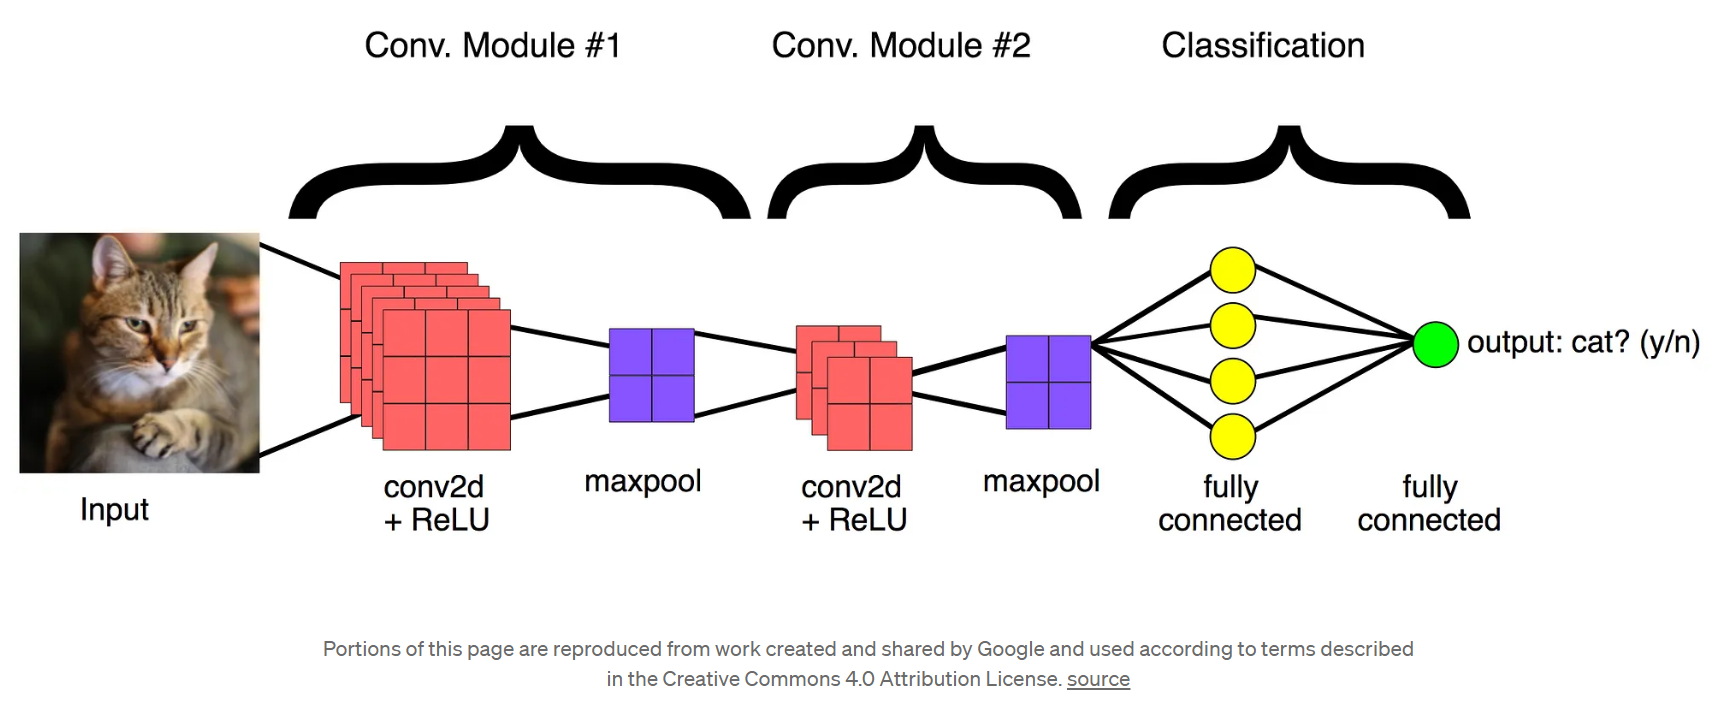

## Load and Prepare Your Data

we will use the MNIST dataset, which is a collection of 70,000 images of handwritten digits from 0 to 9. The images are 28x28 pixels in size and grayscale.

The MNIST dataset is available in the Keras library as a built-in dataset. You can load it using the following code:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

This will download the dataset and split it into training and testing sets. The training set contains 60,000 images and labels, while the testing set contains 10,000 images and labels.

In [ ]:
plt.figure(figsize=(10,10)) # Create a figure with a size of 10x10 inches
for i in range(25): # Loop over 25 indices
    plt.subplot(5,5,i+1) # Create a subplot at the i+1 position
    plt.imshow(x_train[i], cmap='gray') # Show the image at the i index
    plt.title(y_train[i]) # Show the label of the image as the title
plt.show() # Display the figure

## Reshape and Normalize Your Data
The next step is to reshape and normalize your data to make it suitable for the CNN. The CNN expects the input data to have four dimensions: batch size, height, width, and channels. The batch size is the number of images that are processed at once. The height and width are the dimensions of the image. The channels are the number of color channels in the image.

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)



## Define Your CNN Model

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
#sample code for creating Convolutional Neural Network

model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

## Exercise

Convert 3d numpy array to 2d numpy array

In [ ]:
import numpy as np

# Create a 3D array
array_3d = np.array([[[1, 2, 3], [4, 5, 6], [10, 11, 12]], [[7, 8, 9], [10, 11, 12], [4, 5, 6]]])
print("3D Array:")
print(array_3d)

In [ ]:
array_3d[1,:,:].reshape([1,9])

In [ ]:
# Convert the 3D array to a 2D array

len_x = len(array_3d[1,:,:].flatten())

array_2d = array_3d.reshape([-1, len_x])
print("\n2D Array:")
print(array_2d)

Create an empty numpy ARRAY and apped it

In [ ]:
arr = np.empty((0,3), int)
print("Empty array:")
print(arr)
arr = np.append(arr, np.array([[10,20,30]]), axis=0)
arr = np.append(arr, np.array([[40,50,60]]), axis=0)
arr = np.append(arr, np.array([[400,50,60]]), axis=0)
arr = np.append(arr, np.array([[400,5,60]]), axis=0)
print("After adding two new arrays:")
print(arr)